In [1]:
# Importing all libaries needed
import sklearn.datasets as dset
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [50]:
# Setting up the parameter of the model
param_dict = {
    'num_data_samples': 5,
    'noise': 1000,
    'learning_rate': 1e-4,
    'num_epochs': 500000,
    'num_features': 4
}

In [51]:
x,y = dset.make_regression(n_samples=param_dict['num_data_samples'], n_features=1, noise=param_dict['noise'])
y /= 50  # Scaling y 

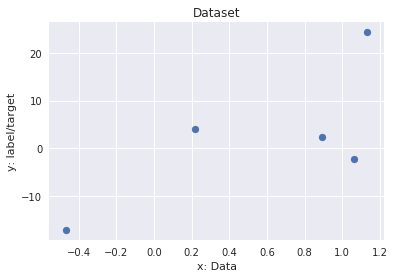

In [52]:
# Visualizing the dataset
plt.scatter(x[:,0],y)
plt.xlabel('x: Data')
plt.ylabel('y: label/target')
plt.title("Dataset")
plt.show()

In [53]:
# Initializing params
def Initializer(features, M):
    N = features.shape[0]
    w = np.ones((M,1))
    x = np.ones((N, M))
    
    for i in range(M):
        x[:,i][:,None] = (features**i)

    return x,w
    
x_poly, w =Initializer(x,param_dict['num_features'])

In [54]:
# Mean Squared Error Loss
def MSE_loss(x,w,y):
    y_pred = np.dot(x,w).reshape(-1,) # Linear transformation
    loss = 0.5 * np.sum(np.square(y_pred-y), axis=0) 
    return loss

# Stochstic Gradient Descent
def optimzer(x,w,y):
    y_pred = np.dot(x,w).reshape(-1,) 
    dW = np.sum((y_pred - y)[:,None]*x , axis=0)
    w -= learning_rate*dW[:,None]
    return w


In [55]:
learning_rate = param_dict['learning_rate']
loss_list = []
# Training the model:
for i in range(param_dict['num_epochs']):
    loss = MSE_loss(x_poly,w,y)
    loss_list.append(loss)
    w = optimzer(x_poly,w,y)

In [56]:
x_test =np.linspace(-2,2,100)
def poly(x,w,M):
    y = 0.0
    for i in range(M):
        y += w[i]*x**i

    
    return y 


In [57]:
y_test = poly(x_test,w,param_dict['num_features'])

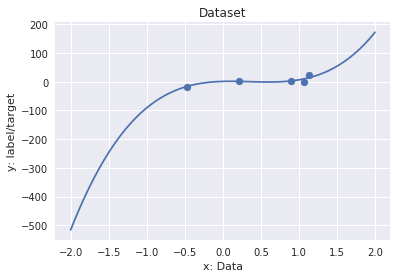

In [58]:
# Visualizing the dataset
plt.scatter(x,y)
plt.plot(x_test,y_test)
plt.xlabel('x: Data')
plt.ylabel('y: label/target')
plt.title("Dataset")
plt.show()

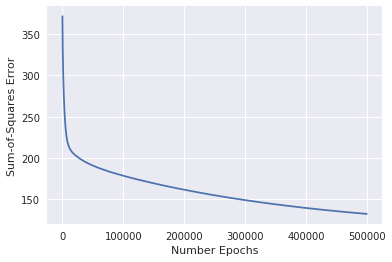

In [59]:
plt.plot(range(len(loss_list)), loss_list)
plt.xlabel('Number Epochs')
plt.ylabel('Sum-of-Squares Error')
plt.show()

In [47]:
loss_list[-1]

0.8587585913527476

In [49]:
loss_list[-3]

0.8587757726864291